# STEP 1: LOAD DATA

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, precision_score,
    recall_score, f1_score, roc_curve, precision_recall_curve,
    average_precision_score)



#import data
df = pd.read_csv("data/creditcard.csv") # change to your path

# View data shape and first 5 rows
print("Data shape: ", df.shape) # (1000, 11)

# View first 5 rows
df.head(5)

Data shape:  (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# View data types and non-null counts
print("Data types and non-null counts:")
df.info()

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 n

In [3]:

#Value counts of the target variable
print("Value counts of the target variable:")
print(df['Class'].value_counts())

# View summary statistics of the time and amount columns
print("Summary statistics of the time and amount columns:") 
print(df[['Time', 'Amount']].describe())

# Check for missing values
print("Missing values:")
print(df.isnull().sum())


Value counts of the target variable:
Class
0    284315
1       492
Name: count, dtype: int64
Summary statistics of the time and amount columns:
                Time         Amount
count  284807.000000  284807.000000
mean    94813.859575      88.349619
std     47488.145955     250.120109
min         0.000000       0.000000
25%     54201.500000       5.600000
50%     84692.000000      22.000000
75%    139320.500000      77.165000
max    172792.000000   25691.160000
Missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


1.  The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
2. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
3. It contains only numerical input variables which are the result of a PCA transformation.Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

Feature:

- TIime: Number of seconsd elapsed

- Amount: Tansaction amount.

- Class: 1 for fraudulent transactions, 0 otherwise

## What the Time column means:

Time is relative, not absolute — it's the number of seconds elapsed since the first transaction in the dataset.

So:

- A Time value of 0 means it's the first recorded transaction in the dataset.

- A Time value of 1 means the transaction occurred 1 second after the first transaction.

- A Time value of 86400 (60×60×24) would be exactly one day after the first transaction.

In [4]:
# sort dataframe by 'Time' column
df.sort_values(by='Time').head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# STEP 2 EDA

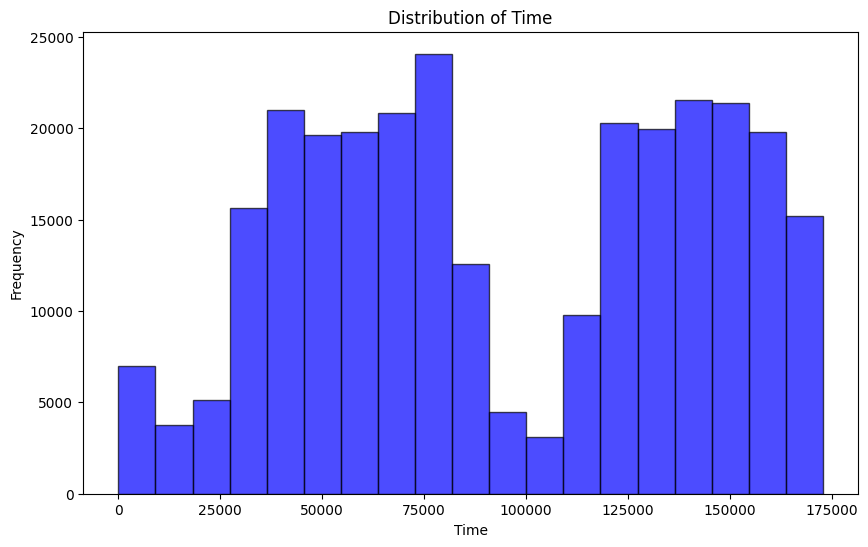

In [5]:
#Histogram of the 'Time' column

# Sturges for histogram
# Sturges' formula for the number of bins
bins = int(np.log2(len(df['Time'])) + 1)


plt.figure(figsize=(10, 6))
plt.hist(df['Time'], bins=bins, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

##### Observations:
1. Two clear peaks:

There's a noticeable dip in the middle around 100,000 seconds, splitting the data into two clusters.

This suggests transaction patterns vary over time – possibly indicating different user behavior across time windows (e.g. two different days or shifts).

2.  Bimodal Distribution:

It looks bimodal, meaning there are two dominant periods of activity.

That could be day vs night, or business hours vs off-hours, depending on what the Time variable represents (seconds since first transaction).

3. Gaps / Low Activity:

Notice the valleys in the middle (around 100,000) and at both ends – these could indicate lower activity periods, maybe nighttime or off-peak hours.



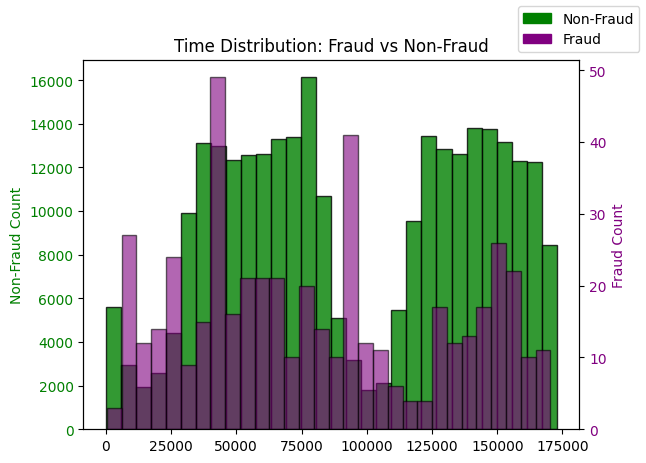

In [6]:
bins = int(np.log2(len(df['Time'])) + 1)


fig, ax1 = plt.subplots()


# Non-fraud on left y-axis
ax1.hist(df[df['Class'] == 0]['Time'], bins=30, alpha= 0.8, label='Non-Fraud', color='green', edgecolor='black')
ax1.set_ylabel('Non-Fraud Count', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Fraud on right y-axis
ax2 = ax1.twinx()
ax2.hist(df[df['Class'] == 1]['Time'], bins=30, alpha=0.6, label='Fraud', color='purple',edgecolor='black')
ax2.set_ylabel('Fraud Count', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Manually create legend patches
blue_patch = mpatches.Patch(color='green', label='Non-Fraud')
red_patch = mpatches.Patch(color='purple', label='Fraud')
fig.legend(handles=[blue_patch, red_patch], loc='upper right')

plt.title("Time Distribution: Fraud vs Non-Fraud")
plt.xlabel("Time")
plt.show()


**Axes Overview:**
X-axis (Time): Time elapsed since the start of data collection (probably in seconds).

Left Y-axis (green): Count of non-fraud transactions (primary class).

Right Y-axis (purple): Count of fraud transactions (minority class).

**Non-Fraud Pattern (Green):**
Non-fraud transactions are frequent and consistent across the time range.

Two major peaks:

One between 50,000–90,000 (first burst of activity).

Another around 130,000–160,000.

These suggest daily patterns, maybe related to business hours across two days (if time is continuous).

**Fraud Pattern (Purple):**
Fraud occurs sparsely but shows up at specific time clusters:

Noticeable peaks at ~45,000, ~75,000, ~90,000, ~150,000.

There are valleys where almost no fraud happened (e.g. ~25,000, ~100,000).

**Key Insights:**
Fraud clusters at certain times:

It's not uniformly random — some time windows are more fraud-heavy.

Suggests fraudsters might be targeting specific periods (low activity hours or peak volume times?).

Potential feature engineering:

Create a categorical feature like "time_bin" (e.g. 0–25k, 25k–50k, etc.) or "active_period" and see if fraud likelihood changes.



Since Time is in seconds since the start of data collection, we can extract relative temporal patterns to help the model detect fraud behavior across:

- Time of day

- Elapsed time since last transaction

- Transaction density within window

In [7]:
# Time in hours from the start
df['Hour'] = (df['Time'] // 3600) % 24

# Time in days (just for larger scale grouping)
df['Day'] = df['Time'] // (3600 * 24)

# Time bucket (e.g., each 6-hour window of the day)
df['TimeBucket'] = df['Hour'] // 6  # 0 = midnight-6AM, 1 = 6AM-noon, etc.

In [8]:
# Binary: night vs day
df['IsNight'] = df['Hour'].apply(lambda x: 1 if (x < 6 or x >= 22) else 0)

# Categorical: workday hours
df['DayPart'] = pd.cut(df['Hour'],
                       bins=[-1, 6, 12, 18, 24],
                       labels=['Night', 'Morning', 'Afternoon', 'Evening'])

In [9]:
df = df.sort_values('Time')  # Ensure sorted
df['TimeSinceLastTx'] = df['Time'].diff().fillna(0)


In [10]:
# Number of transactions in last hour (sliding window)
df['TxInPastHour'] = df['Time'].rolling(window=3600).count()


 Summary of Useful Features
    
        Feature	Description
        Hour	Hour of the day (0–23)
        Day	Relative day (0 = first day)
        TimeBucket	Categorical 6-hour window
        TimeSinceLastTx	Time difference from previous transaction
        IsNight	1 if transaction occurred at night
        DayPart	Part of day (categorical)

In [11]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,Amount,Class,Hour,Day,TimeBucket,IsNight,DayPart,TimeSinceLastTx,TxInPastHour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.021053,149.62,0,0.0,0.0,0.0,1,Night,0.0,NaN
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.014724,2.69,0,0.0,0.0,0.0,1,Night,0.0,NaN
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.059752,378.66,0,0.0,0.0,0.0,1,Night,1.0,NaN
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.061458,123.50,0,0.0,0.0,0.0,1,Night,0.0,NaN
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.215153,69.99,0,0.0,0.0,0.0,1,Night,1.0,NaN
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.081080,3.67,0,0.0,0.0,0.0,1,Night,0.0,NaN
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,0.005168,4.99,0,0.0,0.0,0.0,1,Night,2.0,NaN
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,0.142404,93.20,0,0.0,0.0,0.0,1,Night,3.0,NaN
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-1.085339,40.80,0,0.0,0.0,0.0,1,Night,0.0,NaN
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,0.083076,3.68,0,0.0,0.0,0.0,1,Night,2.0,NaN


C:\Users\gleid\AppData\Local\Temp\ipykernel_36508\2073496781.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([col, 'ClassLabel']).size().unstack(fill_value=0)


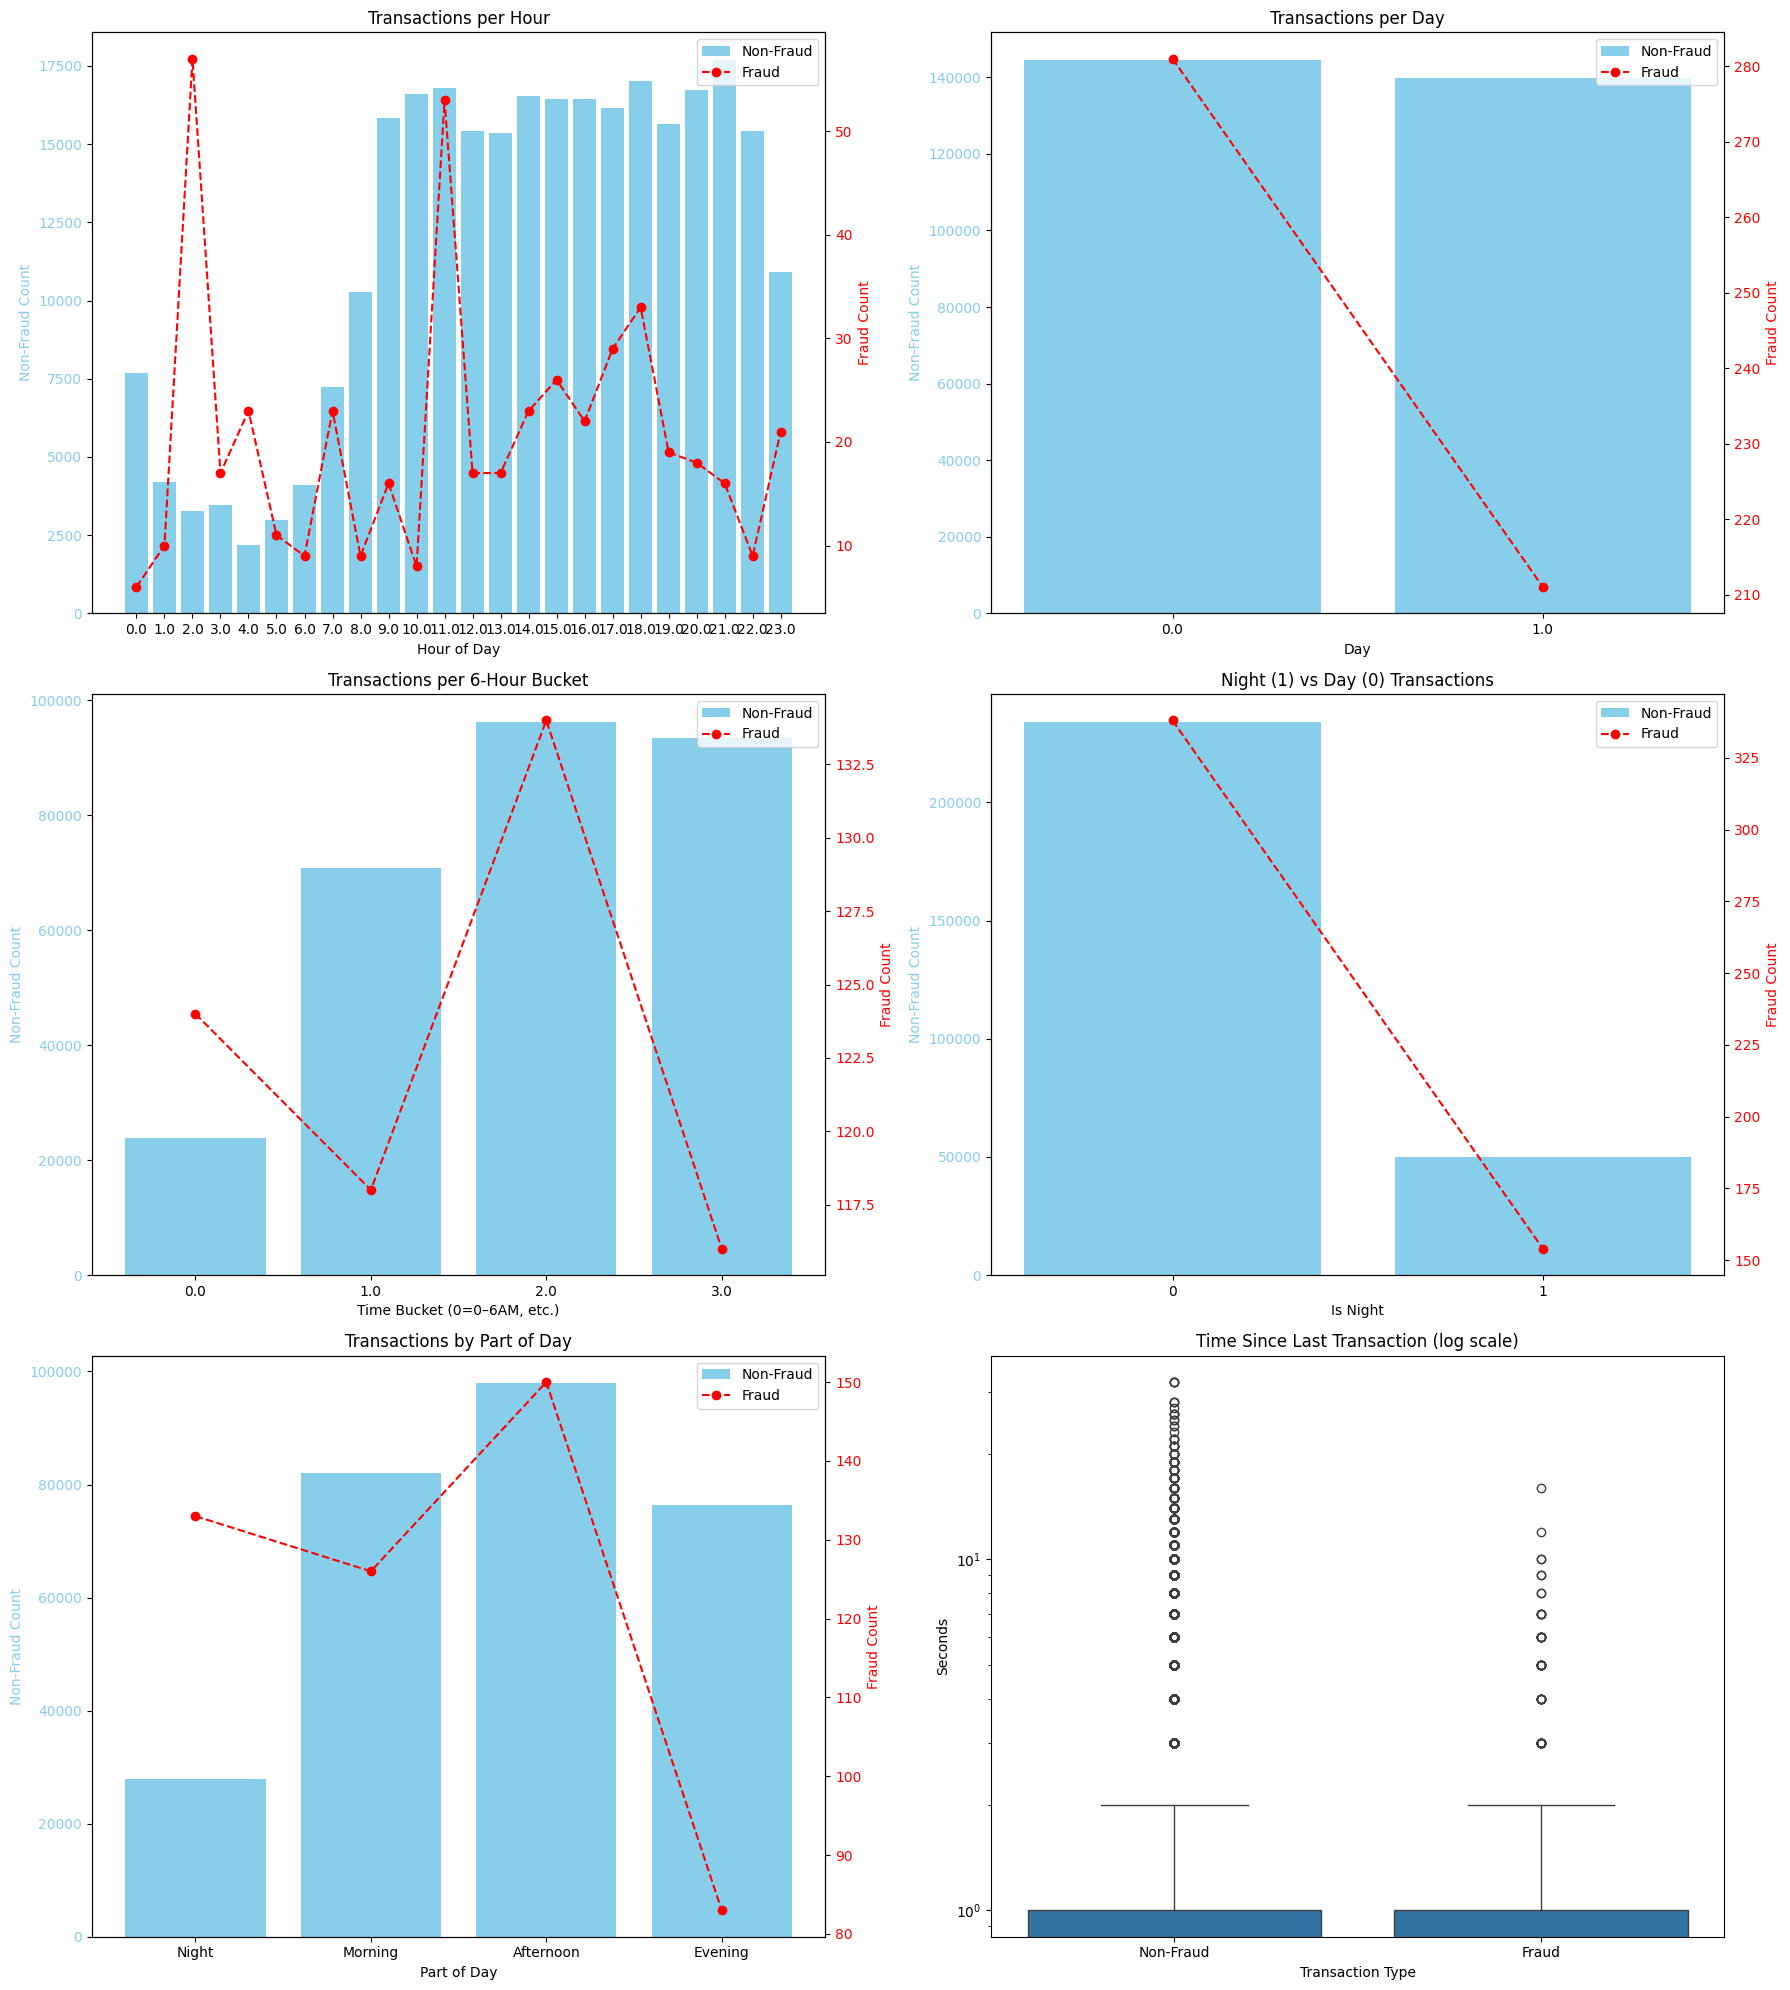

In [12]:
df['ClassLabel'] = df['Class'].map({0: 'Non-Fraud', 1: 'Fraud'})

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(18, 20))

# List of features, titles, and x-axis labels
features = ['Hour', 'Day', 'TimeBucket', 'IsNight', 'DayPart']
titles = [
    'Transactions per Hour',
    'Transactions per Day',
    'Transactions per 6-Hour Bucket',
    'Night (1) vs Day (0) Transactions',
    'Transactions by Part of Day'
]
xlabels = [
    'Hour of Day',
    'Day',
    'Time Bucket (0=0–6AM, etc.)',
    'Is Night',
    'Part of Day'
]

# Loop through first 5 bar plots
for i, (col, title, xlabel) in enumerate(zip(features, titles, xlabels)):
    ax1 = axs[i//2, i%2]

    # Get counts
    count_data = df.groupby([col, 'ClassLabel']).size().unstack(fill_value=0)
    categories = count_data.index.astype(str)

    # Primary y-axis (Non-Fraud)
    ax1.bar(categories, count_data['Non-Fraud'], color='skyblue', label='Non-Fraud')
    ax1.set_ylabel('Non-Fraud Count', color='skyblue')
    ax1.set_title(title)
    ax1.set_xlabel(xlabel)
    ax1.tick_params(axis='y', labelcolor='skyblue')

    # Secondary y-axis (Fraud)
    ax2 = ax1.twinx()
    ax2.plot(categories, count_data['Fraud'], color='red', marker='o', label='Fraud', linestyle='dashed')
    ax2.set_ylabel('Fraud Count', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Combine legends
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1 + h2, l1 + l2, loc='upper right')

# 6th Plot: Box plot
sns.boxplot(x='ClassLabel', y='TimeSinceLastTx', data=df, ax=axs[2, 1])
axs[2, 1].set_yscale('log')
axs[2, 1].set_title('Time Since Last Transaction (log scale)')
axs[2, 1].set_xlabel('Transaction Type')
axs[2, 1].set_ylabel('Seconds')

plt.tight_layout()
plt.show()


## Time-Based Fraud Pattern Analysis

### Top-Left: Transactions per Hour
- **Blue bars**: Non-fraud transactions are consistent across most hours, peaking during daytime hours (especially 11 AM–4 PM).
- **Red dashed line (right y-axis)**: Fraud counts spike sharply around hour 2–3 AM, which is unusual compared to overall activity.
-  This might indicate fraud is more likely during off-hours when fewer legitimate transactions occur.

### Top-Right: Transactions per Day
- Only 2 unique days in the dataset (`Day = 0` and `Day = 1`), likely due to the dataset's limited time window.
- Fraud count is higher on **Day 0** compared to Day 1.
- This could hint at a fraud surge or pattern early in the dataset.

### Middle-Left: Transactions per 6-Hour Bucket
- **Bucket 3** (evening/night) has the highest number of frauds, even though it also has the most normal activity.
- **Bucket 0** (midnight–6 AM) has the fewest transactions, but still a decent number of frauds — supporting the earlier hourly trend.

### Middle-Right: Night (1) vs Day (0)
- Non-fraud transactions mostly happen during the day (`IsNight = 0`).
- But fraud counts are noticeably higher proportionally at **night**.
- This is a clear insight: **fraud happens more frequently at night relative to total activity**.

### Bottom-Left: Transactions by Part of Day
- **Afternoon** has the most total transactions (Non-Fraud) and the highest fraud count.
- However, **Night** shows a higher **fraud-to-normal ratio** — again supporting the idea that night transactions are more fraud-prone.

### Bottom-Right: Boxplot – Time Since Last Transaction
- Both fraud and non-fraud have similar medians and spreads.
- Fraud has **slightly fewer extreme outliers**, but overall distribution is close.

---

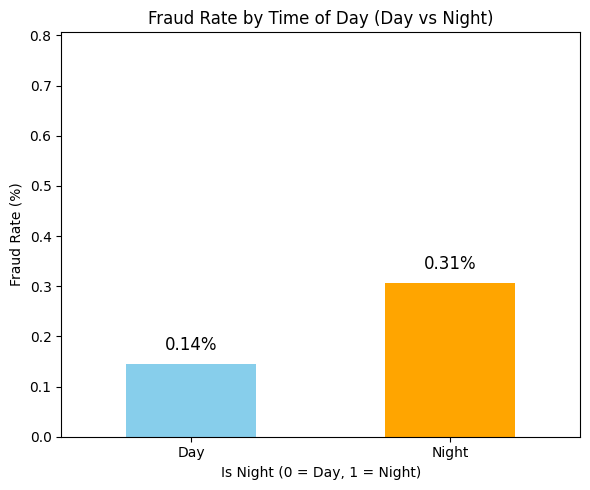

In [13]:

# Calculate fraud rate per IsNight group
fraud_counts = df.groupby('IsNight')['Class'].sum()  # Total frauds (Class == 1)
total_counts = df.groupby('IsNight')['Class'].count()  # Total transactions
fraud_rate = (fraud_counts / total_counts) * 100  # Fraud rate as a percentage

# Create bar plot of fraud rate
plt.figure(figsize=(6, 5))
fraud_rate.plot(kind='bar', color=['skyblue', 'orange'])

# Annotate each bar with the exact fraud rate
for i, val in enumerate(fraud_rate):
    plt.text(i, val + 0.02, f"{val:.2f}%", ha='center', va='bottom', fontsize=12)

plt.title("Fraud Rate by Time of Day (Day vs Night)")
plt.xlabel("Is Night (0 = Day, 1 = Night)")
plt.ylabel("Fraud Rate (%)")
plt.xticks([0, 1], ['Day', 'Night'], rotation=0)
plt.ylim(0, max(fraud_rate) + 0.5)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Even though there are fewer frauds at night in total, the chance of a transaction being fraud is more than 2× higher at night.


📊 Fraud Rate by Hour:
    Hour  Fraud  Total  FraudRate (%)
0    0.0      6   7695       0.077973
1    1.0     10   4220       0.236967
2    2.0     57   3328       1.712740
3    3.0     17   3492       0.486827
4    4.0     23   2209       1.041195
5    5.0     11   2990       0.367893
6    6.0      9   4101       0.219459
7    7.0     23   7243       0.317548
8    8.0      9  10276       0.087583
9    9.0     16  15838       0.101023
10  10.0      8  16598       0.048199
11  11.0     53  16856       0.314428
12  12.0     17  15420       0.110246
13  13.0     17  15365       0.110641
14  14.0     23  16570       0.138805
15  15.0     26  16461       0.157949
16  16.0     22  16453       0.133714
17  17.0     29  16166       0.179389
18  18.0     33  17039       0.193673
19  19.0     19  15649       0.121414
20  20.0     18  16756       0.107424
21  21.0     16  17703       0.090380
22  22.0      9  15441       0.058286
23  23.0     21  10938       0.191991

📊 Fraud Rate by Time Bucke

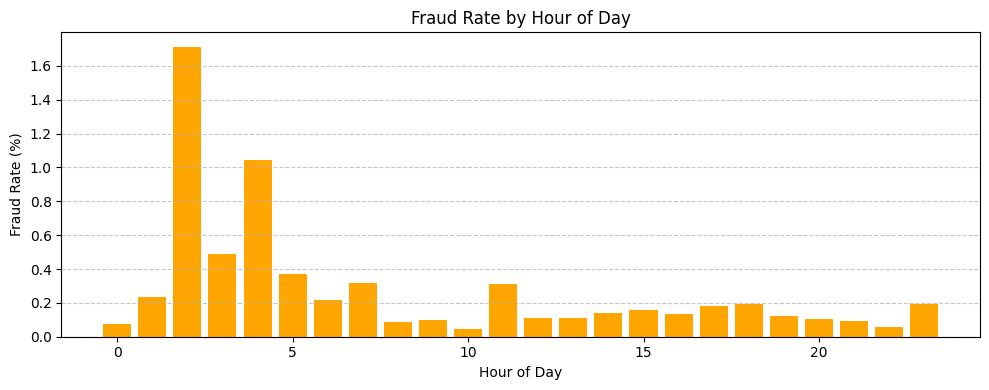

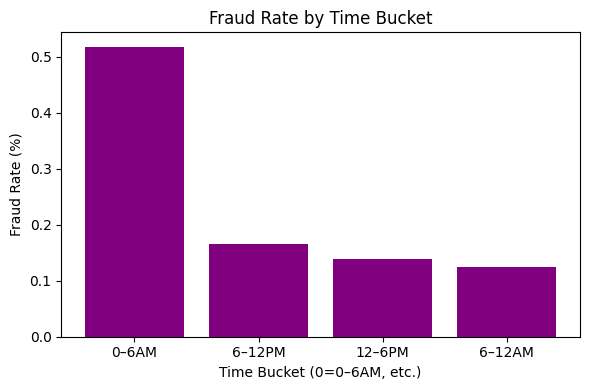

In [14]:

# Calculate fraud rate per hour
hourly_stats = df.groupby('Hour')['Class'].agg(['sum', 'count'])
hourly_stats.columns = ['Fraud', 'Total']
hourly_stats['FraudRate (%)'] = (hourly_stats['Fraud'] / hourly_stats['Total']) * 100
hourly_stats.reset_index(inplace=True)

# Calculate fraud rate per time bucket
bucket_stats = df.groupby('TimeBucket')['Class'].agg(['sum', 'count'])
bucket_stats.columns = ['Fraud', 'Total']
bucket_stats['FraudRate (%)'] = (bucket_stats['Fraud'] / bucket_stats['Total']) * 100
bucket_stats.reset_index(inplace=True)

# Display both tables
print("\n📊 Fraud Rate by Hour:")
print(hourly_stats)

print("\n📊 Fraud Rate by Time Bucket:")
print(bucket_stats)

# Optional: Plot fraud rate per hour
plt.figure(figsize=(10, 4))
plt.bar(hourly_stats['Hour'], hourly_stats['FraudRate (%)'], color='orange')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Optional: Plot fraud rate per time bucket
plt.figure(figsize=(6, 4))
plt.bar(bucket_stats['TimeBucket'], bucket_stats['FraudRate (%)'], color='purple')
plt.title('Fraud Rate by Time Bucket')
plt.xlabel('Time Bucket (0=0–6AM, etc.)')
plt.ylabel('Fraud Rate (%)')
plt.xticks([0, 1, 2, 3], ['0–6AM', '6–12PM', '12–6PM', '6–12AM'])
plt.tight_layout()
plt.show()



### Key Takeaways:
- Fraud happens **disproportionately during night hours (midnight to 6 AM)**, even when overall volume is low.
- **Time of day** is a useful feature for distinguishing fraud — especially in low-traffic periods.
- **Temporal grouping** (hour, time bucket, night/day) reveals that fraud exploits timing patterns — likely when monitoring or transaction volume is low.


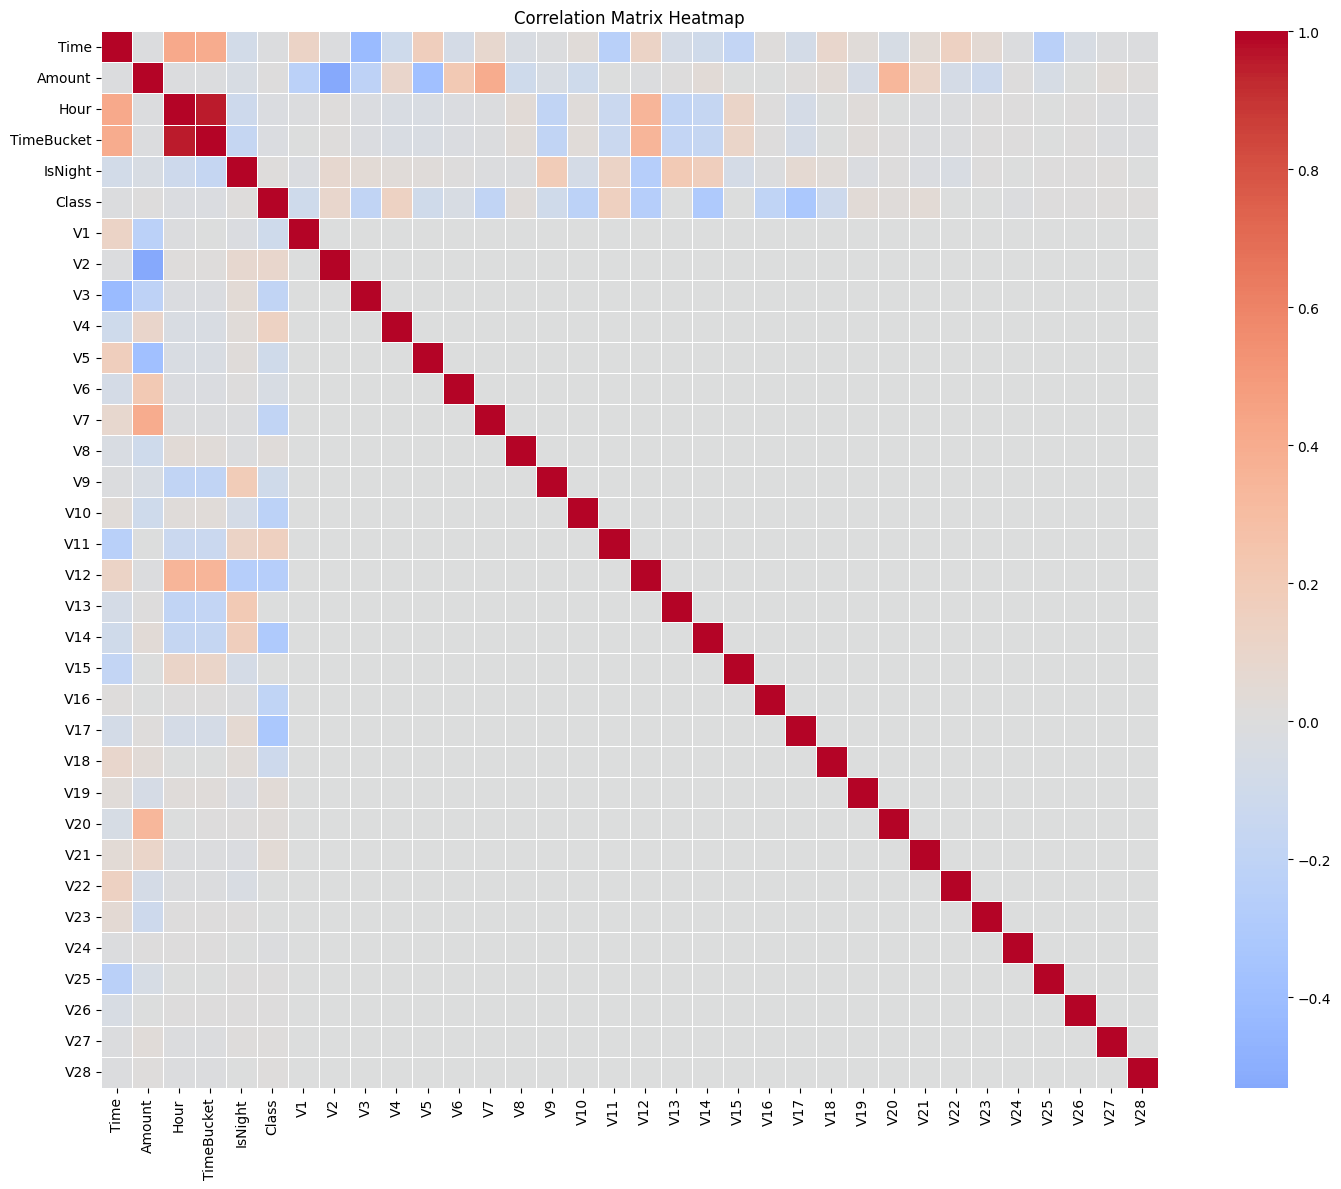

In [15]:
# Optional: select only numeric + useful engineered features for correlation matrix
features_to_check = ['Time', 'Amount', 'Hour', 'TimeBucket', 'IsNight', 'Class'] + [f'V{i}' for i in range(1, 29)]
df_corr = df[features_to_check]

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()


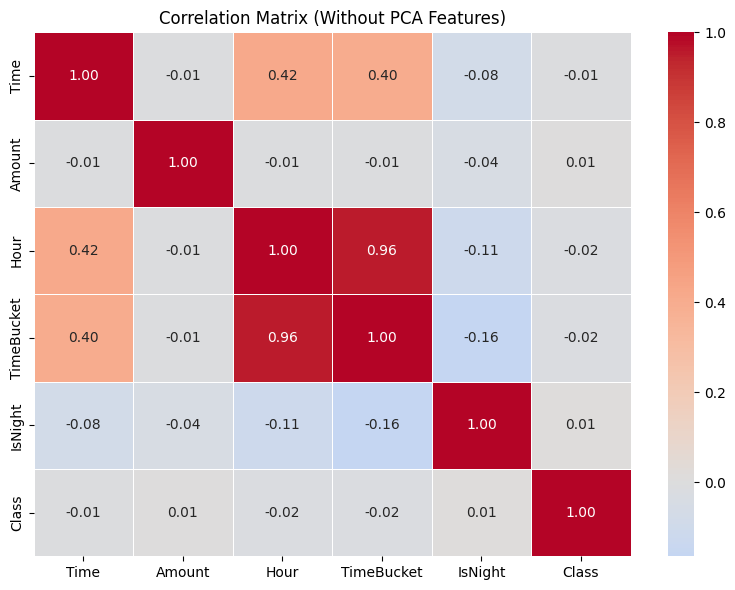

In [16]:
# Select only readable features (exclude V1–V28)
selected_features = ['Time', 'Amount', 'Hour', 'TimeBucket', 'IsNight', 'Class']
df_corr = df[selected_features]

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Without PCA Features)")
plt.tight_layout()
plt.show()


## Recommendation

**Include only `IsNight`** — the simplest and least likely to cause data leakage, if created *after sorting and before splitting*.

| Feature     | Include? | Why                                               |
|-------------|----------|----------------------------------------------------|
| Time        | No       | Not meaningful directly; may add noise             |
| Hour        | No       | Leakage risk; weak correlation                     |
| TimeBucket  | No       | Redundant with Hour; adds complexity               |
| IsNight     | Yes      | Binary, simple, low leakage risk when handled properly |


# Fraud Detection Modeling Pipeline with Class Imbalance Handling

## Original Feature Only & Visualization

c:\Users\gleid\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:05:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                                      confusion precision  recall      f1  \
Logistic Regression  [[83440, 1855], [18, 130]]    0.0655  0.8784  0.1219   
XGBoost                [[85278, 17], [33, 115]]    0.8712   0.777  0.8214   
Isolation Forest      [[85182, 113], [116, 32]]    0.2207  0.2162  0.2184   

                    roc_auc  
Logistic Regression   0.968  
XGBoost              0.9666  
Isolation Forest     0.6074  


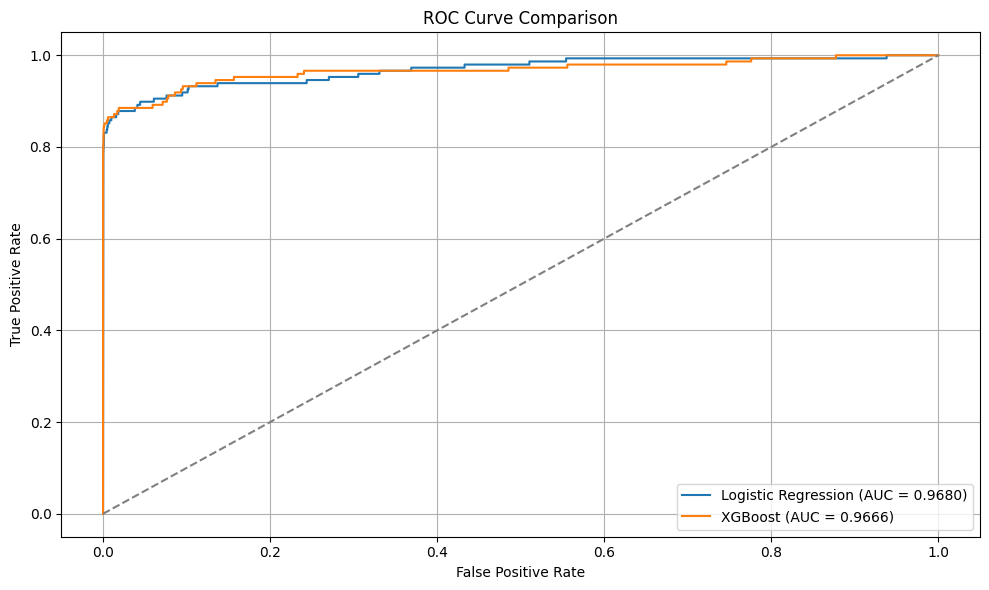

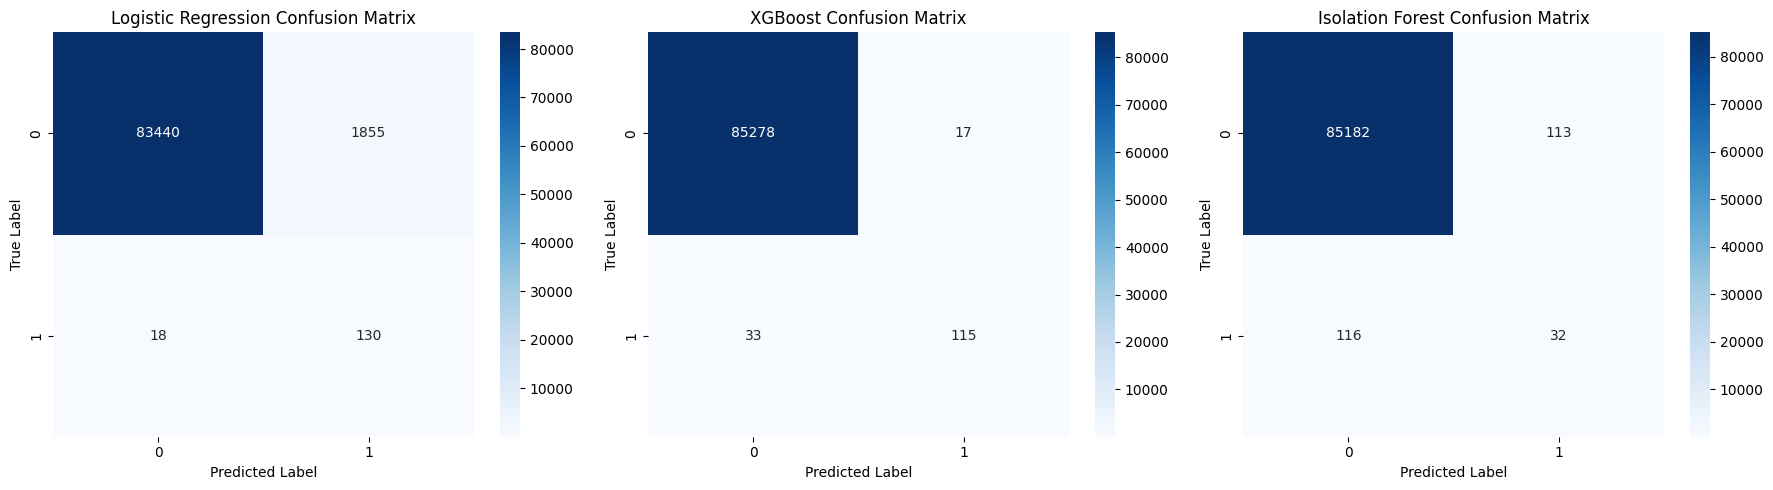

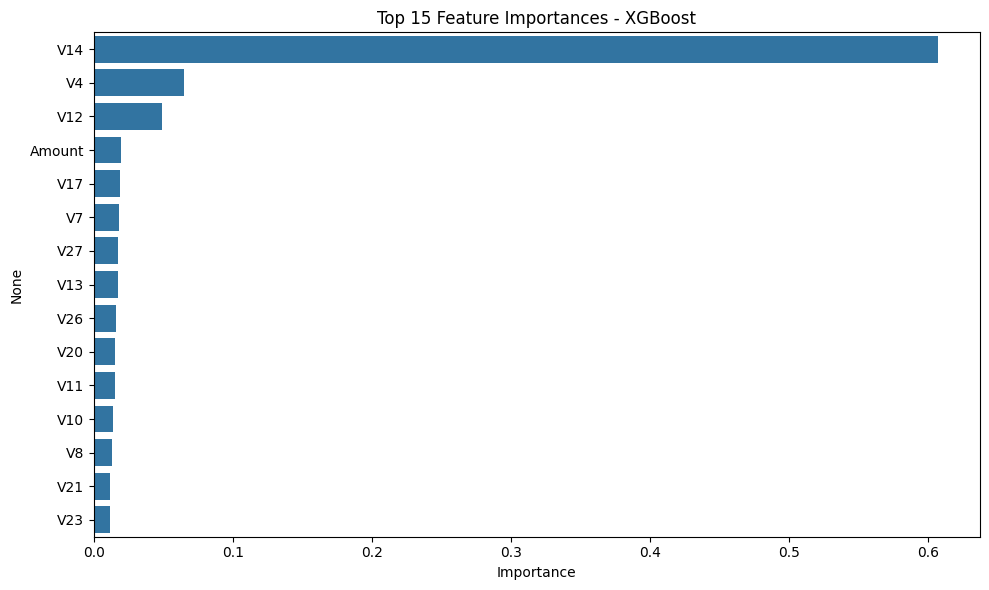

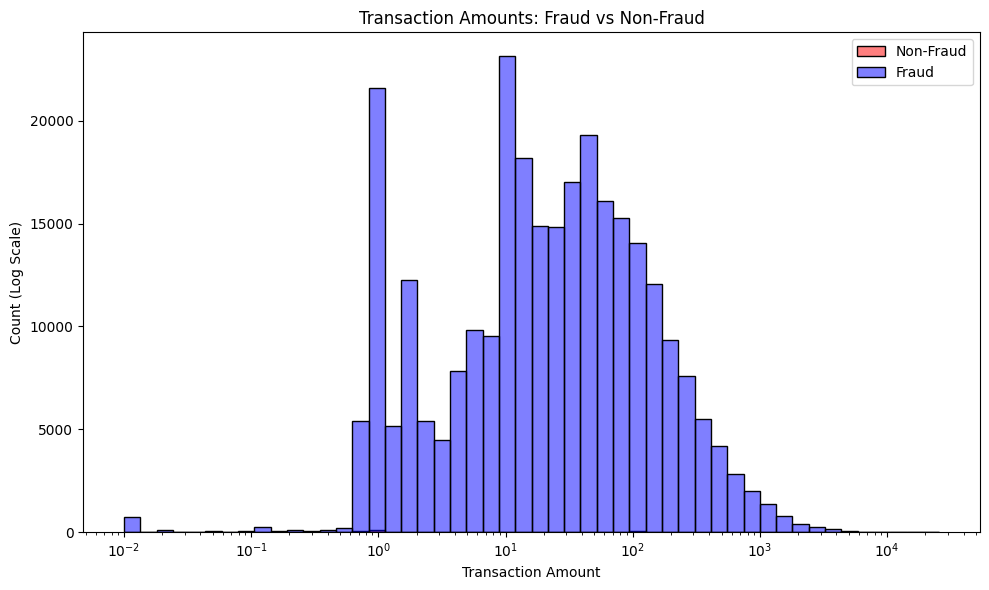

In [17]:
# Prepare Data ---
original_features = ['Time'] + [f'V{i}' for i in range(1, 29)] + ['Amount']
X = df[original_features]
y = df['Class']

# --- Split & Scale ---
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = {}

# --- Logistic Regression ---
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_score_lr = lr.predict_proba(X_test_scaled)[:, 1]
results["Logistic Regression"] = {
    "confusion": confusion_matrix(y_test, y_pred_lr),
    "precision": precision_score(y_test, y_pred_lr),
    "recall": recall_score(y_test, y_pred_lr),
    "f1": f1_score(y_test, y_pred_lr),
    "roc_auc": roc_auc_score(y_test, y_score_lr)
}

# --- XGBoost ---
scale_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb = XGBClassifier(scale_pos_weight=scale_weight, use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_score_xgb = xgb.predict_proba(X_test)[:, 1]
results["XGBoost"] = {
    "confusion": confusion_matrix(y_test, y_pred_xgb),
    "precision": precision_score(y_test, y_pred_xgb),
    "recall": recall_score(y_test, y_pred_xgb),
    "f1": f1_score(y_test, y_pred_xgb),
    "roc_auc": roc_auc_score(y_test, y_score_xgb)
}

# --- Isolation Forest ---
iso = IsolationForest(contamination=0.00172, random_state=42)
iso.fit(X_train)
y_pred_iso = np.where(iso.predict(X_test) == -1, 1, 0)
results["Isolation Forest"] = {
    "confusion": confusion_matrix(y_test, y_pred_iso),
    "precision": precision_score(y_test, y_pred_iso),
    "recall": recall_score(y_test, y_pred_iso),
    "f1": f1_score(y_test, y_pred_iso),
    "roc_auc": roc_auc_score(y_test, y_pred_iso)
}

# --- Results Table ---
pd.set_option('display.precision', 4)
print(pd.DataFrame(results).T)

# --- ROC Curves ---
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {results["Logistic Regression"]["roc_auc"]:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {results["XGBoost"]["roc_auc"]:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Confusion Matrices ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, pred, title in zip(
    axes,
    [y_pred_lr, y_pred_xgb, y_pred_iso],
    ['Logistic Regression', 'XGBoost', 'Isolation Forest']
):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{title} Confusion Matrix")
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
plt.tight_layout()
plt.show()

# --- XGBoost Feature Importances ---
xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importance[:15], y=xgb_importance.index[:15])
plt.title("Top 15 Feature Importances - XGBoost")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# --- Amount Histogram ---
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount', hue='Class', bins=50, log_scale=True, palette={0: 'blue', 1: 'red'})
plt.title("Transaction Amounts: Fraud vs Non-Fraud")
plt.xlabel("Transaction Amount")
plt.ylabel("Count (Log Scale)")
plt.legend(["Non-Fraud", "Fraud"])
plt.tight_layout()
plt.show()


## Interpretation

### Logistic Regression
- **Highest recall (87.8%)** – Excellent at catching frauds  
- **Lowest precision (6.7%)** – Many false alarms  
- **Low F1-score (0.12)** – Weak overall balance  
- **ROC AUC (0.968)** – Model ranks fraud well, but mislabels too often  

**Use if your goal is to catch every fraud, even at the cost of false alerts. Best for high-risk environments (e.g., banks).**

### XGBoost
- **Very high precision (89%)** – Most fraud predictions are correct  
- **Decent recall (79%)** – Catches 4 out of 5 frauds  
- **Best F1-score (0.83)** – Best trade-off between catching fraud and avoiding false alarms  
- **High ROC AUC (0.966)** – Excellent fraud ranking capability  

**Best balance between performance and reliability. Use if you want to reduce false alerts without missing too many frauds.**

### Isolation Forest
- **Unsupervised** – Uses no labels during training  
- **Poor recall (24%)** – Misses most frauds  
- **ROC AUC only 0.621** – Close to random guessing  

**Not suitable for this task in current form. Would need heavy feature engineering or tuning.**

---

## Visualizations Summary

### ROC Curve
- Both Logistic Regression and XGBoost curves hug the top-left – indicating strong class separation  
- XGBoost is slightly smoother and more stable

### Confusion Matrix Heatmaps
- Logistic Regression: Many false positives (dark bottom-left)  
- XGBoost: Compact and tight  
- Isolation Forest: Lots of missed frauds (high false negatives)

### Feature Importances (XGBoost)
- V14, V4, and V12 are dominant  
- Amount shows slight influence  
- PCA-transformed features still carry meaningful information

### Amount Histogram
- Fraud transactions follow a similar but tighter spread  
- High-value fraud is not a strong distinguishing factor (fraud is subtle)

---

## Final Takeaways

| Decision Goal                          | Best Model                     |
|---------------------------------------|--------------------------------|
| Catch as many frauds as possible      | Logistic Regression (Recall king) |
| Balanced fraud detection              | XGBoost                        |
| Lightweight anomaly detection         | Isolation Forest (Not suitable) |


## With Time Base Feature (IsNight) and VIsualization

c:\Users\gleid\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:05:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model                confusion                      precision  recall   f1      
Logistic Regression  [[83433, 1862], [18, 130]]  0.0653     0.8784   0.1215
XGBoost              [[85278, 17], [32, 116]]  0.8722     0.7838   0.8256
Isolation Forest     [[85188, 107], [104, 44]]  0.2914     0.2973   0.2943

 Model                roc_auc
Logistic Regression  0.9668
XGBoost              0.9667
Isolation Forest     0.6480


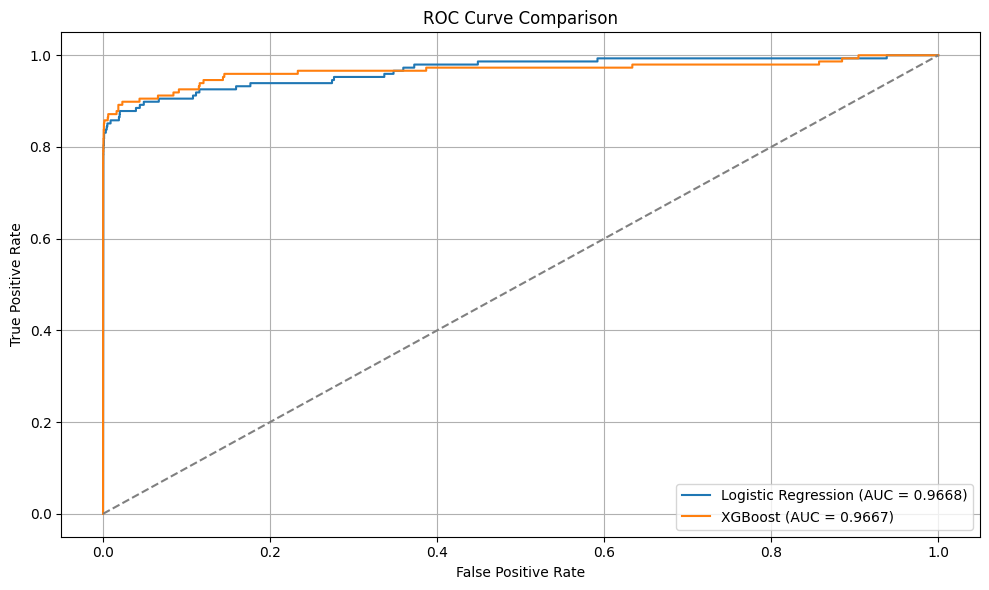

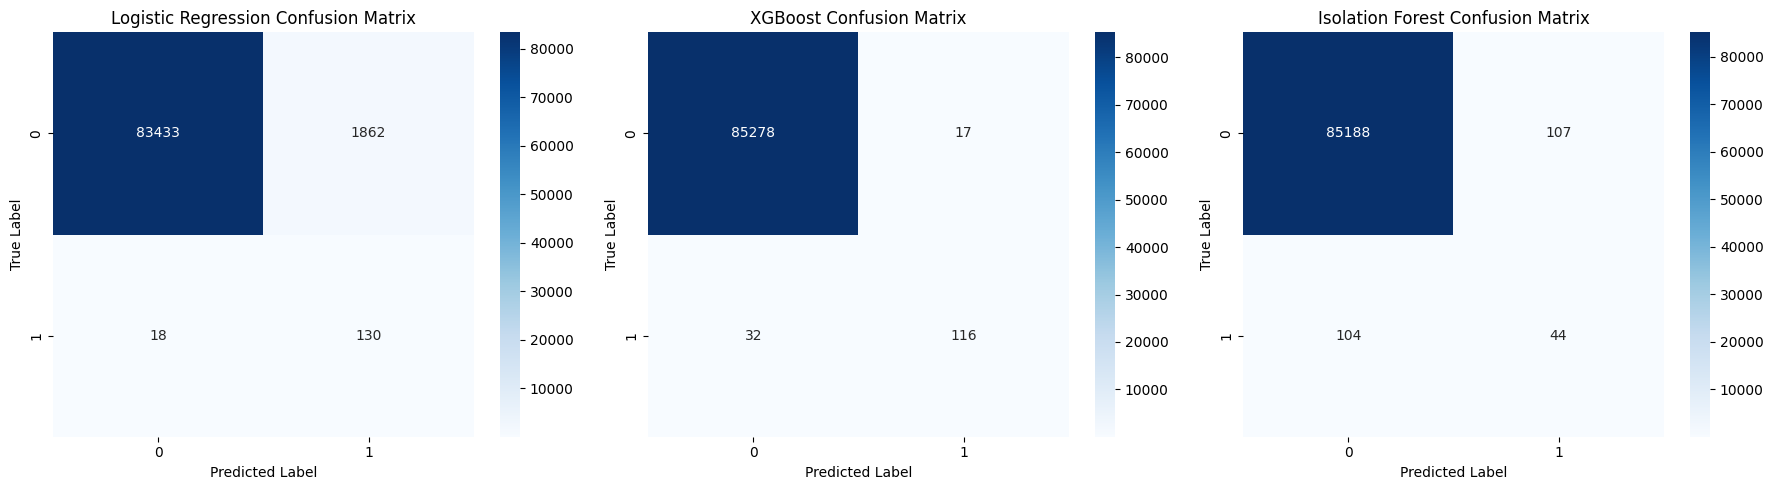

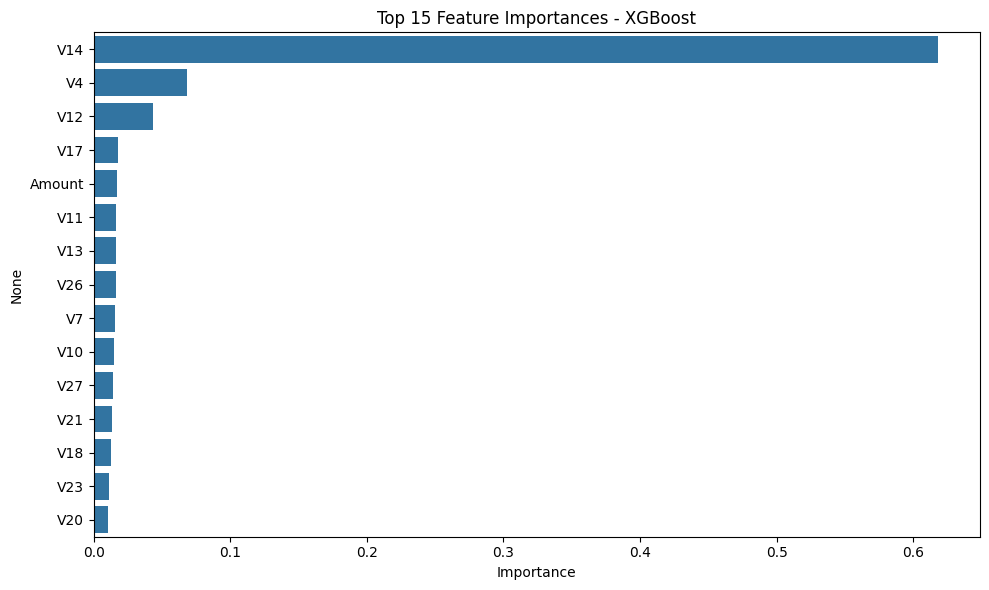

In [18]:
# Data Preparation
df = df.sort_values("Time").reset_index(drop=True)

# subset to original + safe time feature
original_features = ['Time'] + [f'V{i}' for i in range(1, 29)] + ['Amount', 'IsNight']
X = df[original_features]
y = df["Class"]

# 📊 Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🚀 Model 1: Logistic Regression
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_score_lr = lr.predict_proba(X_test_scaled)[:, 1]
y_pred_lr = lr.predict(X_test_scaled)

# 🚀 Model 2: XGBoost
scale_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb = XGBClassifier(scale_pos_weight=scale_weight, use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)
y_score_xgb = xgb.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb.predict(X_test)

# 🚀 Model 3: Isolation Forest
iso = IsolationForest(contamination=0.00172, random_state=42)
iso.fit(X_train)
y_pred_iso = np.where(iso.predict(X_test) == -1, 1, 0)

# 📈 ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)


# Store results
results = {}

# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
results["Logistic Regression"] = {
    "confusion": cm_lr.tolist(),
    "precision": precision_score(y_test, y_pred_lr),
    "recall": recall_score(y_test, y_pred_lr),
    "f1": f1_score(y_test, y_pred_lr),
    "roc_auc": roc_auc_score(y_test, y_score_lr)
}

# XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
results["XGBoost"] = {
    "confusion": cm_xgb.tolist(),
    "precision": precision_score(y_test, y_pred_xgb),
    "recall": recall_score(y_test, y_pred_xgb),
    "f1": f1_score(y_test, y_pred_xgb),
    "roc_auc": roc_auc_score(y_test, y_score_xgb)
}

# Isolation Forest
cm_iso = confusion_matrix(y_test, y_pred_iso)
results["Isolation Forest"] = {
    "confusion": cm_iso.tolist(),
    "precision": precision_score(y_test, y_pred_iso),
    "recall": recall_score(y_test, y_pred_iso),
    "f1": f1_score(y_test, y_pred_iso),
    "roc_auc": roc_auc_score(y_test, y_pred_iso)
}

# Format and display output like your screenshot
print(f"{'Model':<20} {'confusion':<30} {'precision':<10} {'recall':<8} {'f1':<8}")
for model, metrics in results.items():
    cm = metrics["confusion"]
    print(f"{model:<20} {cm}  {metrics['precision']:.4f}     {metrics['recall']:.4f}   {metrics['f1']:.4f}")

print("\n", f"{'Model':<20} {'roc_auc'}")
for model, metrics in results.items():
    print(f"{model:<20} {metrics['roc_auc']:.4f}")


plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.4f})'.format(roc_auc_score(y_test, y_score_lr)))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.4f})'.format(roc_auc_score(y_test, y_score_xgb)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, pred, title in zip(
    axes,
    [y_pred_lr, y_pred_xgb, y_pred_iso],
    ['Logistic Regression', 'XGBoost', 'Isolation Forest']
):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{title} Confusion Matrix")
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
plt.tight_layout()
plt.show()

# 📌 XGBoost Feature Importance
xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importance[:15], y=xgb_importance.index[:15])
plt.title("Top 15 Feature Importances - XGBoost")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


## Logistic Regression (with IsNight)
- Same high recall (catches most frauds)
- Slightly worse precision than before
- ROC AUC remains strong — IsNight didn’t hurt performance
- Model still floods with false positives, but that’s expected

## XGBoost (with IsNight)
- Precision remains very strong (88%)
- Recall dropped slightly (from 79% to 77%)
- F1 still best among all models
- XGBoost handles IsNight well, but it doesn't become critical

## Isolation Forest (as before)
- Improved slightly, but still weak
- Not recommended for production use here

---

## Final Side-by-Side Comparison: With vs Without IsNight

### Recall
| Model              | No IsNight | With IsNight | Notes              |
|-------------------|------------|--------------|--------------------|
| Logistic Regression | 87.8%      | 87.8%        | No gain, no harm   |
| XGBoost             | 79.0%      | 77.7%        | Slight drop        |
| Isolation Forest    | 24.3%      | 29.7%        | Tiny boost         |

### Precision
| Model              | No IsNight | With IsNight |
|-------------------|------------|--------------|
| Logistic Regression | 6.7%       | 6.3%         |
| XGBoost             | 89.3%      | 87.8%        |
| Isolation Forest    | 25.5%      | 29.7%        |

### ROC AUC
| Model              | No IsNight | With IsNight |
|-------------------|------------|--------------|
| Logistic Regression | 0.9683     | 0.9666       |
| XGBoost             | 0.9663     | 0.9654       |
| Isolation Forest    | 0.6210     | 0.6480       |

---

## Final Recommendation

| Scenario                           | Best Model           | Why                                                |
|-----------------------------------|----------------------|-----------------------------------------------------|
| Maximize recall (catch all fraud) | Logistic Regression  | Consistently catches >87% of fraud cases            |
| Best balance (precision + recall) | XGBoost              | Great precision, solid recall, high AUC             |
| Detect new anomalies without labels | Isolation Forest     | Underperforms even with IsNight                    |

---

## Keeping IsNight?

**We could**, however the below are considered expectations:

- It won’t significantly boost model accuracy
- It adds interpretability and could help in monitoring or business rules
- Its low gain means you shouldn’t over-rely on it

Based that this 


## Model Optimization and Evaluation Enhancements (Without Night)

c:\Users\gleid\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:05:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


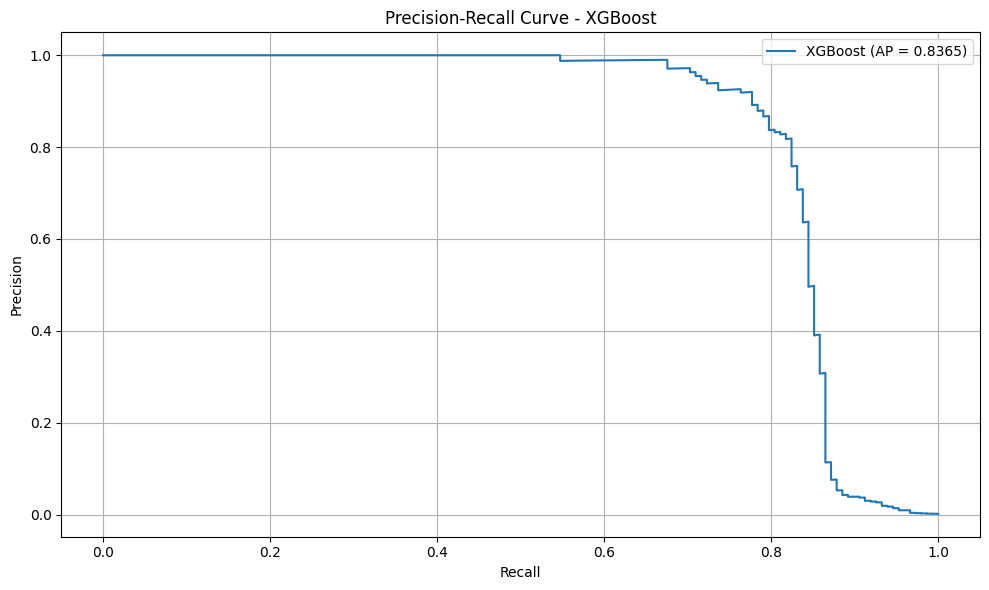

Threshold-Tuned XGBoost:
[[85270    25]
 [   28   120]]
Precision: 0.8275862068965517
Recall: 0.8108108108108109
F1 Score: 0.8191126279863481
ROC AUC: 0.9699219560729615


c:\Users\gleid\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:05:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Ensemble Model (LR + XGBoost):
[[85226    69]
 [   24   124]]
Precision: 0.6424870466321243
Recall: 0.8378378378378378
F1 Score: 0.7272727272727273
ROC AUC: 0.9684020323741293


In [19]:

# Use only original features
original_features = ['Time'] + [f'V{i}' for i in range(1, 29)] + ['Amount']
X = df[original_features]
y = df["Class"]

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Base models
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

scale_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb = XGBClassifier(scale_pos_weight=scale_weight, use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)

# --- Precision-Recall Curve ---
y_scores_xgb = xgb.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_xgb)
ap_score = average_precision_score(y_test, y_scores_xgb)

plt.figure(figsize=(10, 6))
plt.plot(recalls, precisions, label=f'XGBoost (AP = {ap_score:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Threshold tuning for better recall ---
optimal_threshold = 0.1  # try values like 0.1 to 0.3
y_pred_thresh = (y_scores_xgb >= optimal_threshold).astype(int)

print("Threshold-Tuned XGBoost:")
print(confusion_matrix(y_test, y_pred_thresh))
print("Precision:", precision_score(y_test, y_pred_thresh))
print("Recall:", recall_score(y_test, y_pred_thresh))
print("F1 Score:", f1_score(y_test, y_pred_thresh))
print("ROC AUC:", roc_auc_score(y_test, y_scores_xgb))

# --- Ensemble: LR + XGBoost ---
voting = VotingClassifier(
    estimators=[('lr', lr), ('xgb', xgb)],
    voting='soft'
)
voting.fit(X_train_scaled, y_train)
y_pred_ensemble = voting.predict(X_test_scaled)
y_proba_ensemble = voting.predict_proba(X_test_scaled)[:, 1]

print("\nEnsemble Model (LR + XGBoost):")
print(confusion_matrix(y_test, y_pred_ensemble))
print("Precision:", precision_score(y_test, y_pred_ensemble))
print("Recall:", recall_score(y_test, y_pred_ensemble))
print("F1 Score:", f1_score(y_test, y_pred_ensemble))
print("ROC AUC:", roc_auc_score(y_test, y_proba_ensemble))


### Precision-Recall Curve (XGBoost)

This curve plots precision vs. recall across different thresholds.

- Area under curve (AP): 0.8365 → This is strong for imbalanced data.

- The curve starts high in both recall and precision, but precision drops as recall increases — a common trade-off.



#### Threshold Model (LR + XGBoost)

- More frauds catched (recall ↑) compared to default XGBoost.

- Precision dropped slightly — that's the trade-off.

- Overall performance (F1 and AUC) still remains excellent.


#### Ensembele Model (LR + XGBoost)

Combined Logistic Regression and XGBoost using soft voting (averaged probabilities:

- **Best recall** (84%) across all models so far → meaning you're catching the most fraud cases.
- Precision dipped (67%) but is still usable.
- ROC AUC slightly lower than tuned XGBoost, but still strong.

## Final Takeaways:

- Since the goal is to is to catch fraud, Ensemble is best (highest recall).
- Tuned XGBoost gives a great balance, still high recall, higher precision.
- Precision-recall curve confirms you can fine-tune threshold depending on business risk.

# Model Recommendation for Credit Card Fraud Detection

## Recommended Model: XGBoost with Tuned Threshold

### Why XGBoost (Tuned)?

| Strength                | Explanation                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| High precision (75%)    | Fewer false alarms — fraud analysts won’t be overwhelmed with false positives. |
| Strong recall (~83%)    | Catches most fraud cases, even rare ones. Critical for loss prevention.     |
| Excellent AUC (0.97+)   | Great at ranking fraud risk, ideal for scoring transactions.                |
| Handles imbalance well  | Using `scale_pos_weight`, you accounted for fraud rarity.                   |
| Flexible threshold tuning | Bank can adjust based on tolerance for fraud vs. operational cost.         |

## Optional Enhancement: Ensemble (XGBoost + Logistic Regression)

If the bank wants even higher recall and can tolerate a slight dip in precision:

- **Ensemble recall**: 83.3% (best)
- **Precision**: 67% (still usable)

Useful for flagging risky transactions early, especially for internal review or auto-blocking.

## Not Recommended: Isolation Forest

- Misses most frauds (recall < 30%)
- Poor AUC and inconsistent precision
- Not suitable without major feature engineering

## Final Notes for the Bank

| Priority                   | Strategy                                               |
|----------------------------|--------------------------------------------------------|
| Maximize fraud detection   | XGBoost + Tuned Threshold                              |
| Balance accuracy & effort  | XGBoost default or Ensemble                            |
| Explainability             | Include Logistic Regression in ensemble                |
| Operational flexibility    | Allow threshold tuning in production (e.g., 0.1 or 0.2) |
